In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly" # https://plotly.com/python/pandas-backend/
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

In [2]:
c_df = pd.DataFrame([["cardigan", 1450], ["knitwear", 3527], ["dress", 9649], ["leggings", 248], ["vest", 833], ["bratop", 80], ["blouse", 4826],
["shirt", 1922], ["skirt", 4292], ["jacket", 1783], ["jumper", 721], ["jumpsuit", 332], ["jogger pants", 98], ["zipup", 234], ["jean", 4360], ["coat", 1205],
["tops", 2309], ["t-shirt", 7837], ["padded jacket", 423], ["pants",7637], ["hoody",675]], columns=["category", "frequency"])

In [3]:
c_df = c_df.sort_values("frequency").reset_index(drop=True)

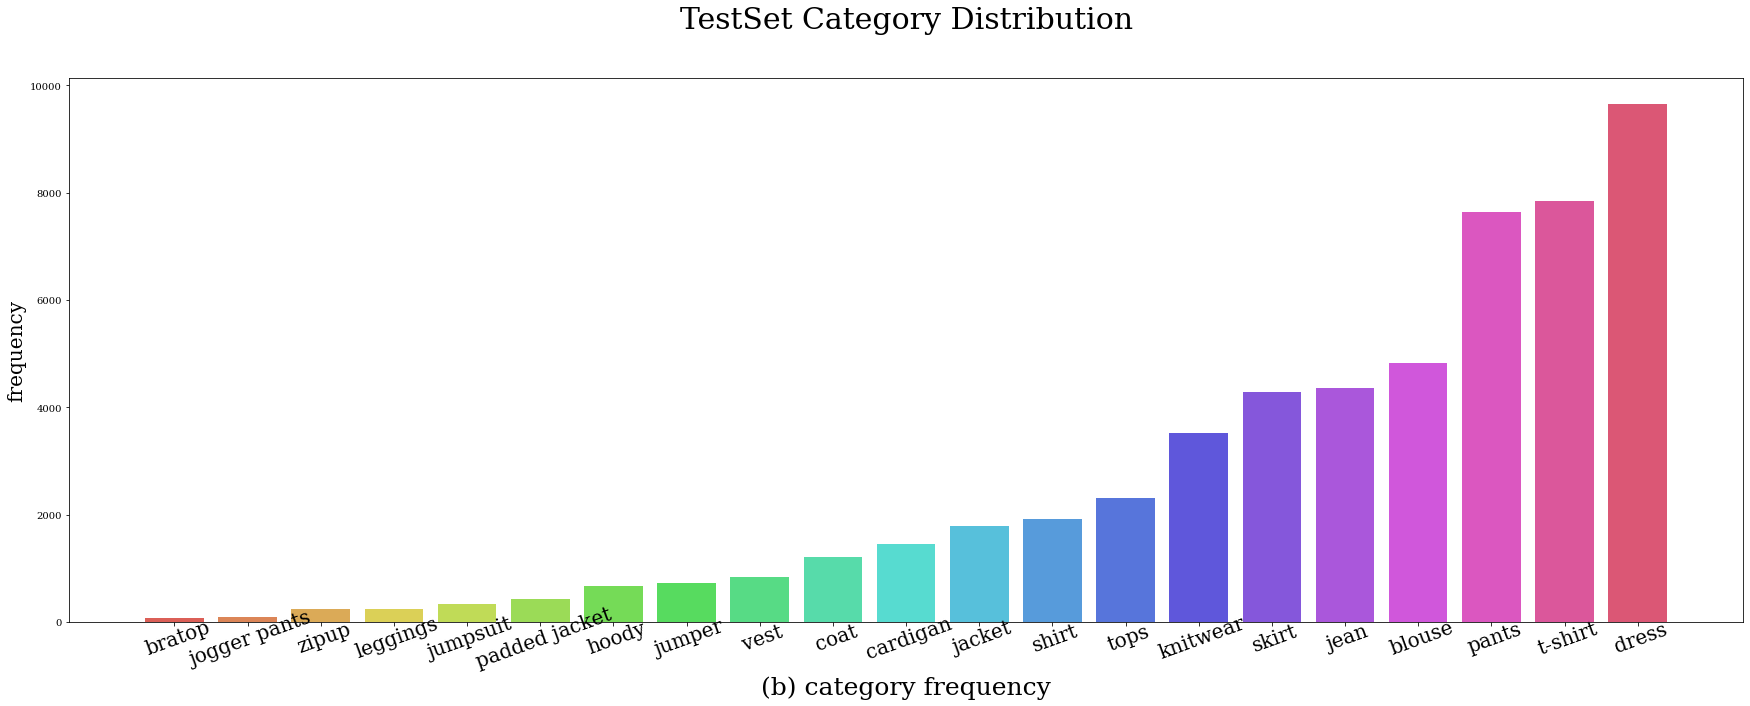

In [4]:
x = np.arange(len(c_df["category"].values.tolist()))
idx = c_df["category"].values.tolist()
values = c_df.frequency.values.tolist()

colors = sns.color_palette('hls',len(c_df["category"].values.tolist()))
plt.figure(figsize=(30,10))
plt.bar(x, values, color=colors)
plt.title("TestSet Category Distribution", fontsize=30,  pad=50)
plt.xticks(x, idx, fontsize=20, rotation=20, rotation_mode="anchor")
plt.xlabel("(b) category frequency", fontsize = 25)
plt.ylabel("frequency", fontsize = 20)
plt.show()

In [2]:
tr = pd.read_csv("./multi_style_tr.csv", index_col=0)
val = pd.read_csv("./multi_style_val.csv", index_col=0)
te = pd.read_csv("./multi_style_test.csv", index_col=0)
val["image"] = "val/"+val["image"]
te["image"] = "test/"+te["image"]

In [3]:
te = val.append(te).reset_index(drop=True)

In [15]:
st_fre = pd.DataFrame(pd.DataFrame(te.iloc[:,1:].sum(axis=0)).reset_index(drop=False).values, columns=["style", "frequency"])

In [17]:
st_fre = st_fre.sort_values("frequency").reset_index(drop=True)

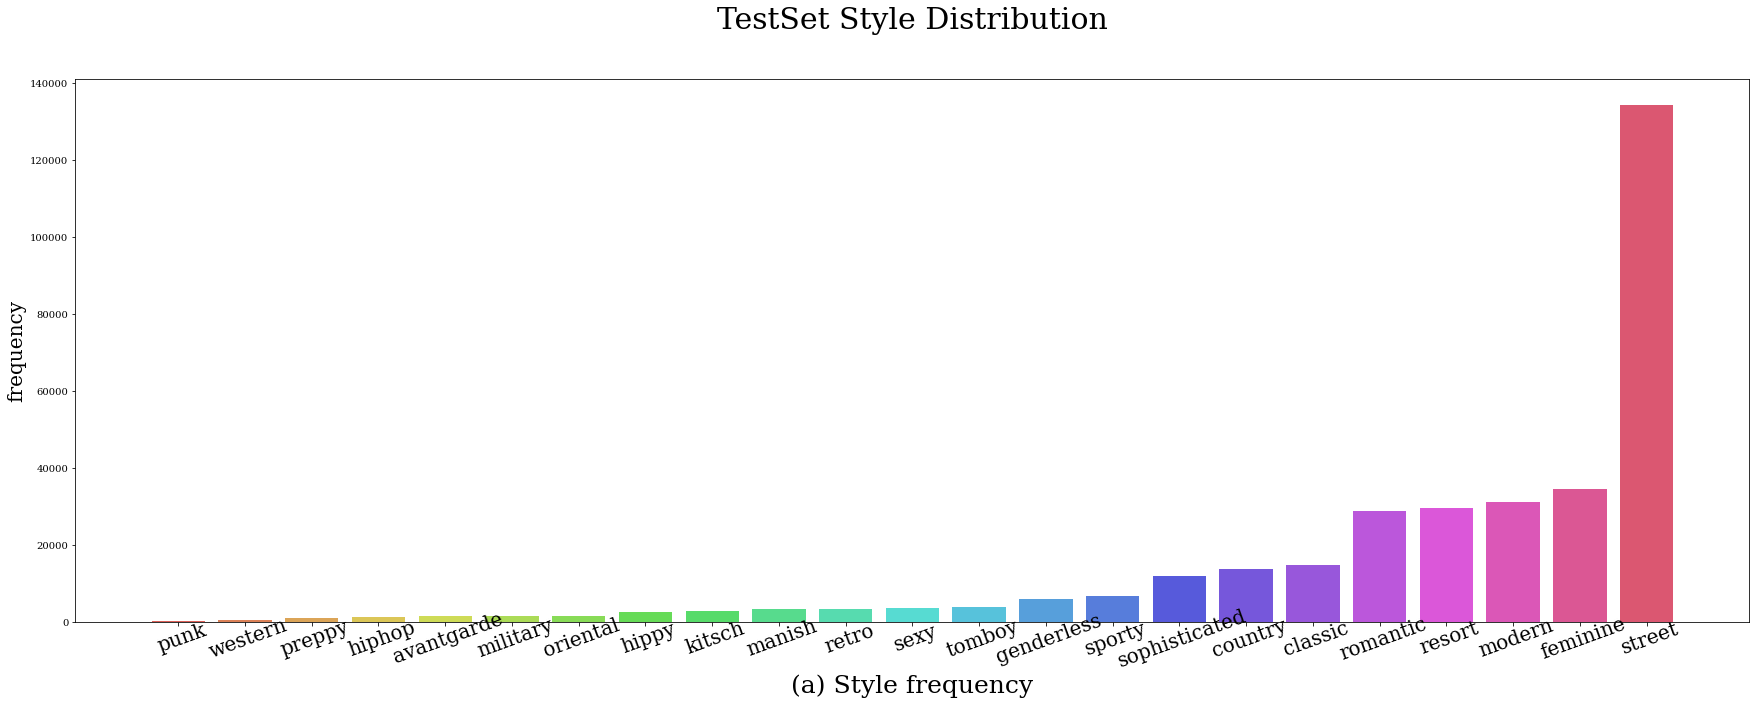

In [51]:
x = np.arange(len(st_fre["style"].values.tolist()))
idx = st_fre["style"].values.tolist()
values = st_fre.frequency.values.tolist()

colors = sns.color_palette('hls',len(st_fre["style"].values.tolist()))
plt.figure(figsize=(30,10))
plt.bar(x, values, color=colors)
plt.title("TestSet Style Distribution", fontsize=30,  pad=50)
plt.xticks(x, idx, fontsize=20, rotation=20, rotation_mode="anchor")
plt.xlabel("(a) Style frequency", fontsize = 25)
plt.ylabel("frequency", fontsize = 20)
plt.show()

In [ ]:
for sy in te.columns[1:].tolist():
    lenth = te.loc[te[sy] == 1].shape[0]
    print(f"{sy} : {lenth}")

In [ ]:
for sy in te.columns[1:].tolist():
    style_df = te.loc[te[sy] == 1].reset_index(drop=True)
    style_df.to_csv(f"./{sy}_style_test.csv")

In [ ]:
style_csvlist = os.listdir("/mnt/hdd1/wearly/ethan/style classification/multi_style")
style_csvlist.remove('multi_style_val.csv')
style_csvlist.remove('multi_style_tr.csv')
style_csvlist.remove('multi_style_tr_sample.csv')
style_csvlist.remove('multi_style_test.csv')
style_csvlist.remove('Data_checking.ipynb')
style_csvlist.remove('.ipynb_checkpoints')

In [ ]:
len(style_csvlist)

In [ ]:
xs=te.index.tolist()
ys=te['volume'].values.tolist()

plt.figure(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volume')

plt.bar(xs, ys, width=0.6, color='grey')


In [ ]:
te.groupby(["image"])["sporty"].sum()